/tmp/ipykernel_17710/1204825314.py:13: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



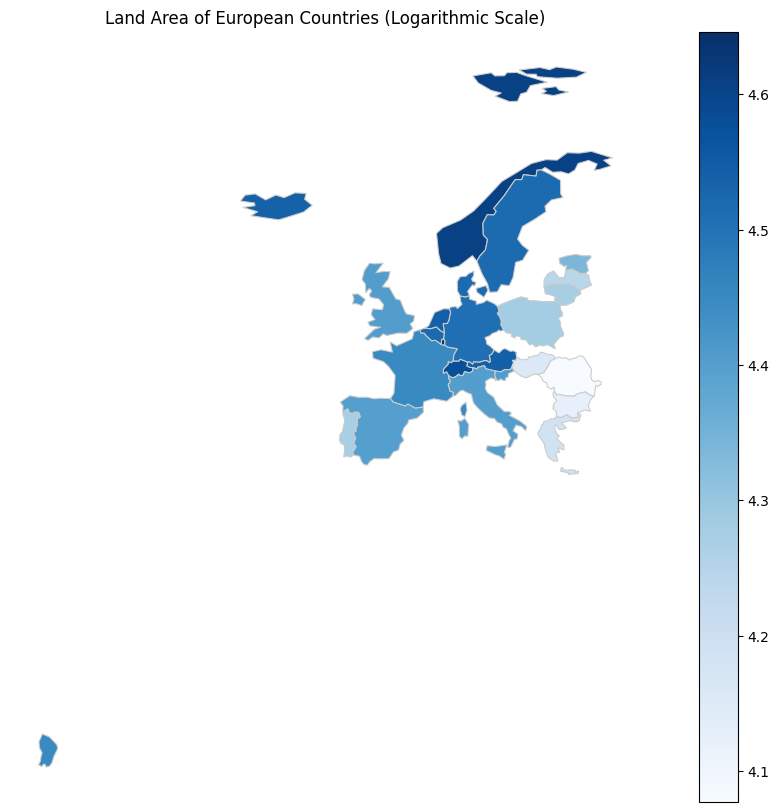

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the data from the CSV file
data = pd.read_csv("../data/country_area.csv")

# Apply logarithmic scaling to the land area values
data["LogLandArea"] = np.log10(data["MedianIncome"])

# Load the shapefile of Europe with higher resolution
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Filter the shapefile to include only European countries
europe = world[world["continent"] == "Europe"]

# Merge the shapefile and data based on the country name
merged = europe.merge(data, left_on="name", right_on="Country")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the map and color each country based on logarithmic land area using a gradient of blue
merged.plot(ax=ax, column="LogLandArea", cmap="Blues", linewidth=0.8, edgecolor="0.8", legend=True)

# Set the title
ax.set_title("Land Area of European Countries (Logarithmic Scale)")

# Remove the axis
ax.axis("off")

# Show the map
plt.show()

In [5]:
import plotly.express as px
import pandas as pd
import numpy as np

# Read the data from the CSV file
data = pd.read_csv("../data/country_area.csv")

# Apply logarithmic scaling to the land area values
data["LogLandArea"] = np.log10(data["MedianIncome"])

# Create a choropleth map using Plotly
fig = px.choropleth(
    data_frame=data,
    locations="Country",
    locationmode="country names",
    color="LogLandArea",
    color_continuous_scale="Blues",
    title="Land Area of European Countries (Logarithmic Scale)"
)

# Display the map
fig.show()